In [1]:
import sys
sys.path.append('../500_pc_KM_rv_cross_match')

from gm_age_relation import *

In [2]:
# initialze the GALAH training

GM = GM_Age_GALAH('../500_pc_KM_rv_cross_match/')

../500_pc_KM_rv_cross_match/gm_age_relation.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['zgal_gaia'][cat['zgal_gaia'] < -1000] = np.nan

../500_pc_KM_rv_cross_match/gm_age_relation.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['UVel_gaia'][cat['UVel_gaia'] < -1000] = np.nan

../500_pc_KM_rv_cross_match/gm_age_relation.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['VVel_gaia'][cat['VVel_gaia'] < -10

100%|██████████| 100/100 [00:00<00:00, 694.14it/s]


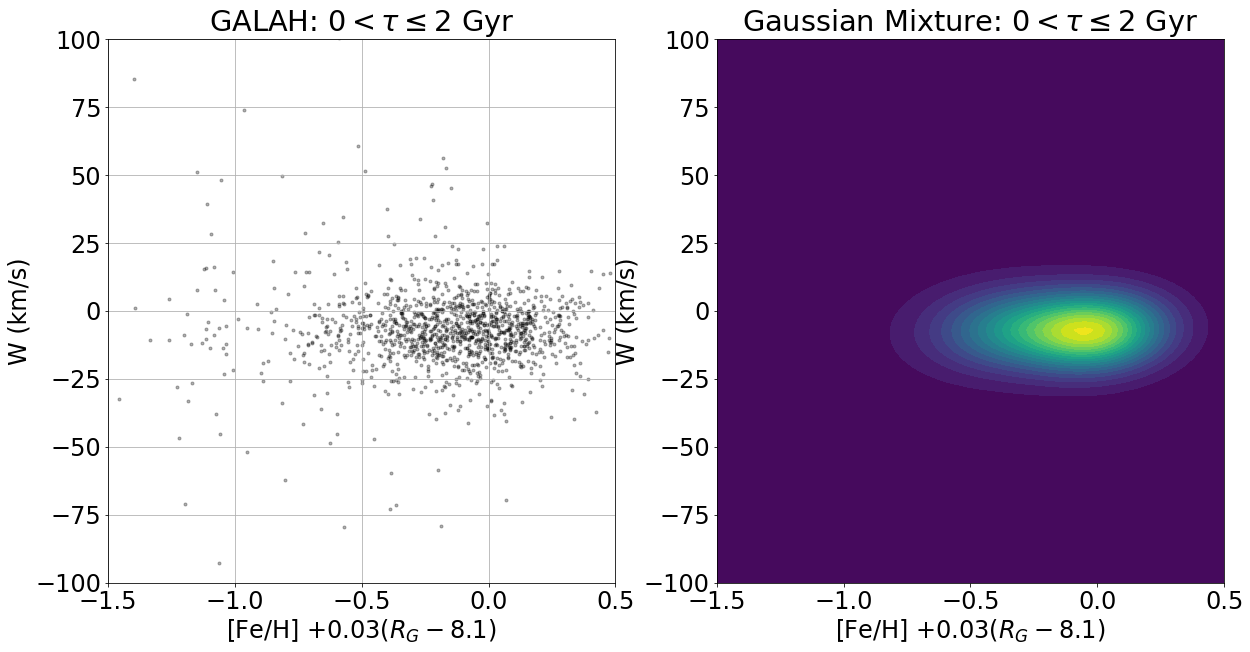

100%|██████████| 100/100 [00:00<00:00, 1214.46it/s]


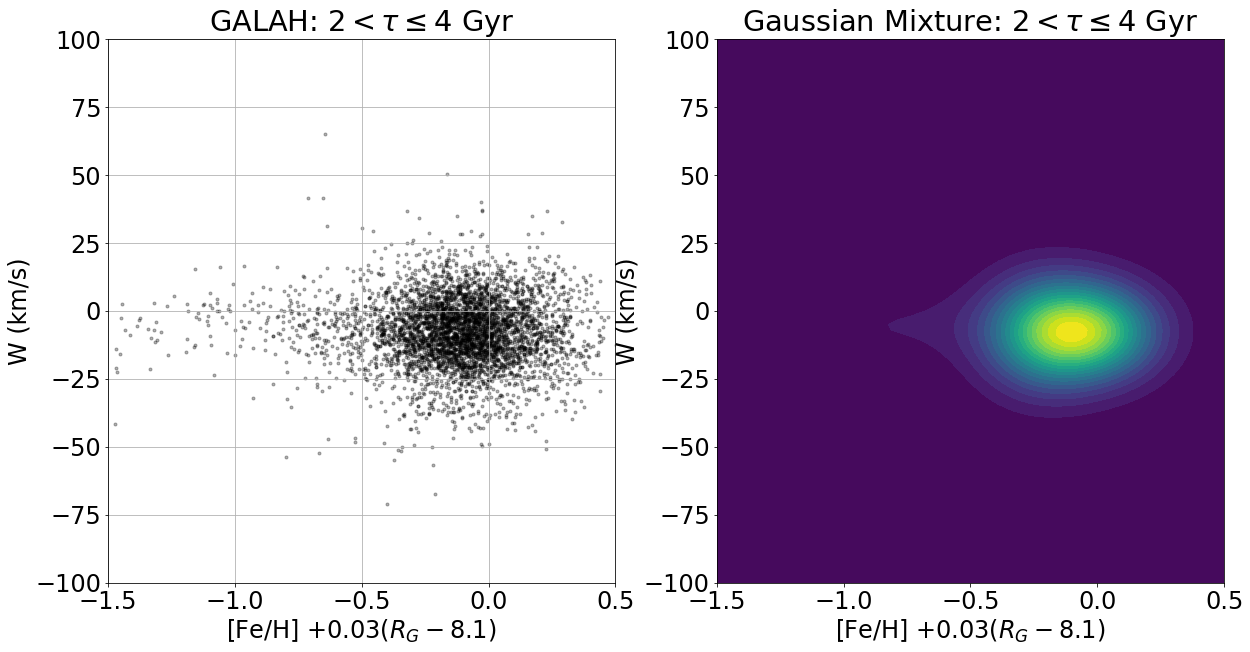

100%|██████████| 100/100 [00:00<00:00, 1163.50it/s]


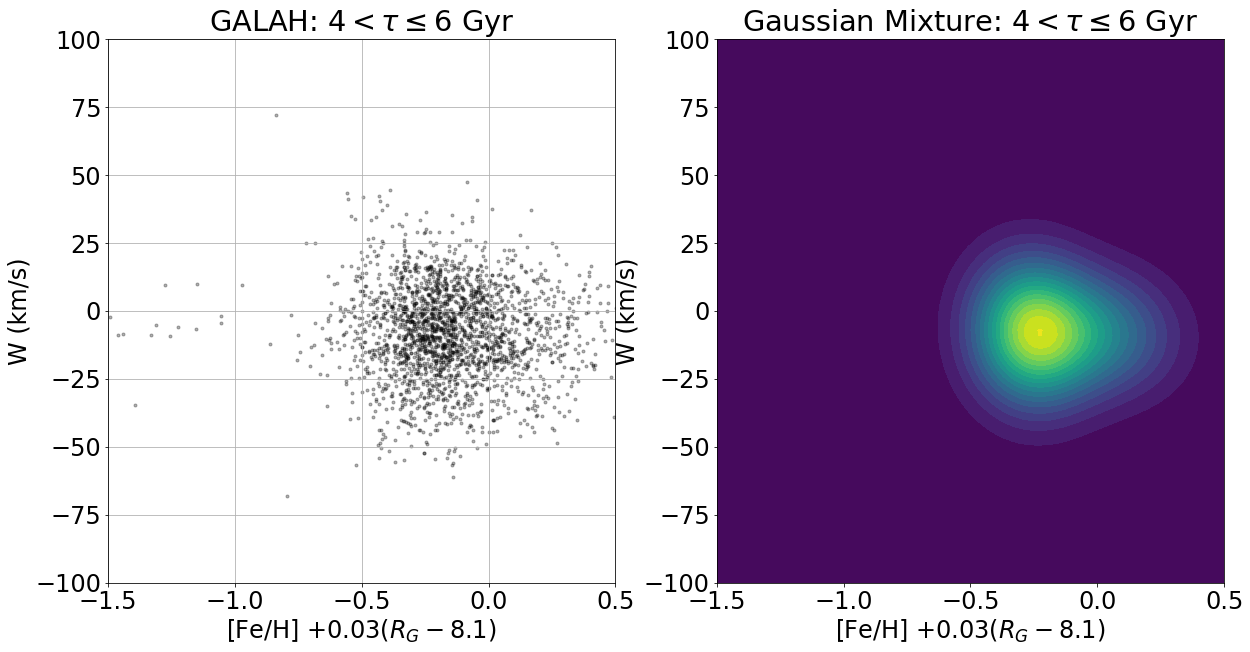

100%|██████████| 100/100 [00:00<00:00, 1366.62it/s]


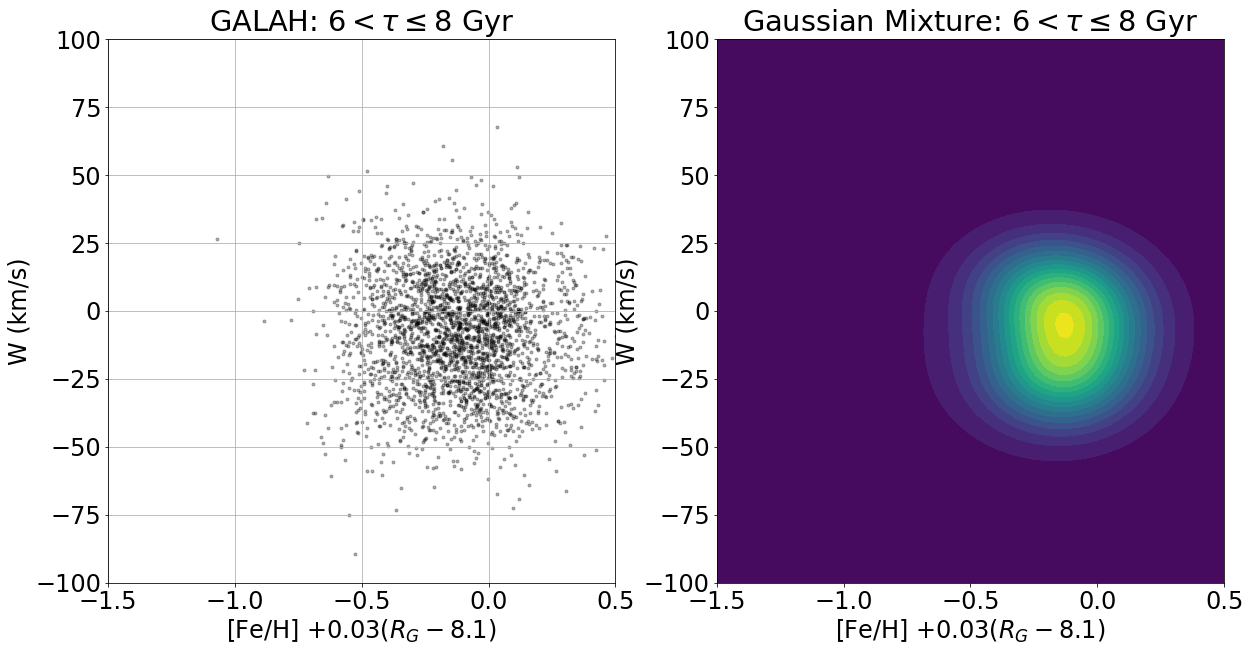

100%|██████████| 100/100 [00:00<00:00, 382.16it/s]


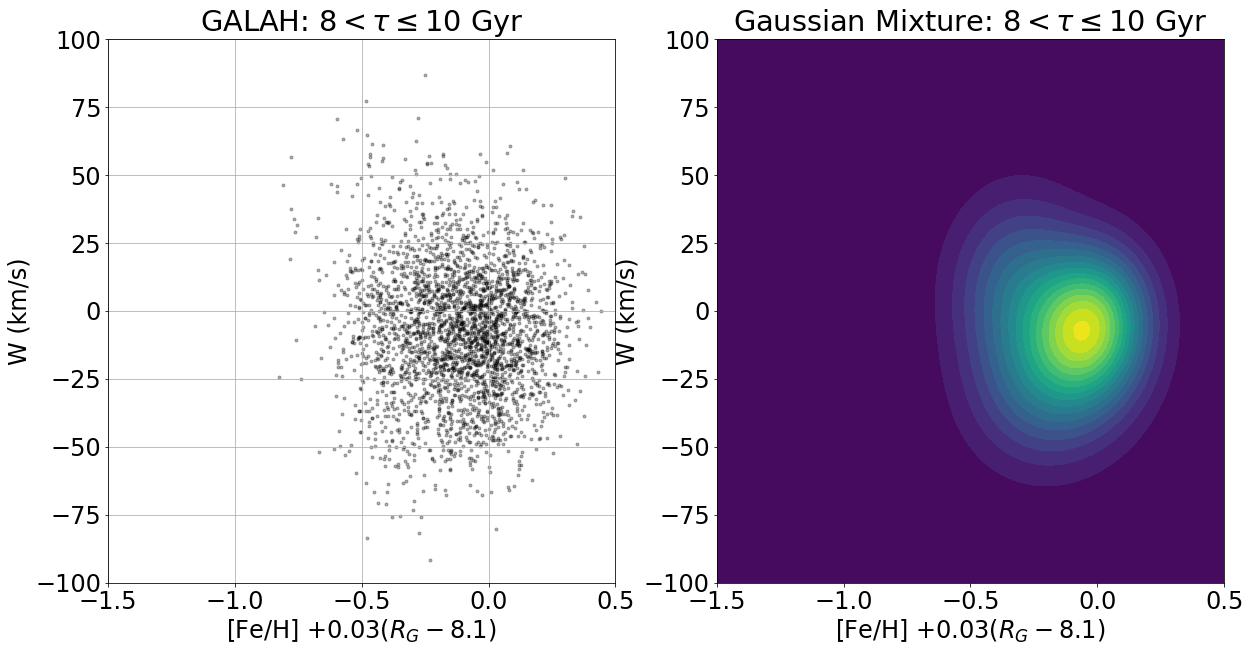

100%|██████████| 100/100 [00:00<00:00, 1136.18it/s]


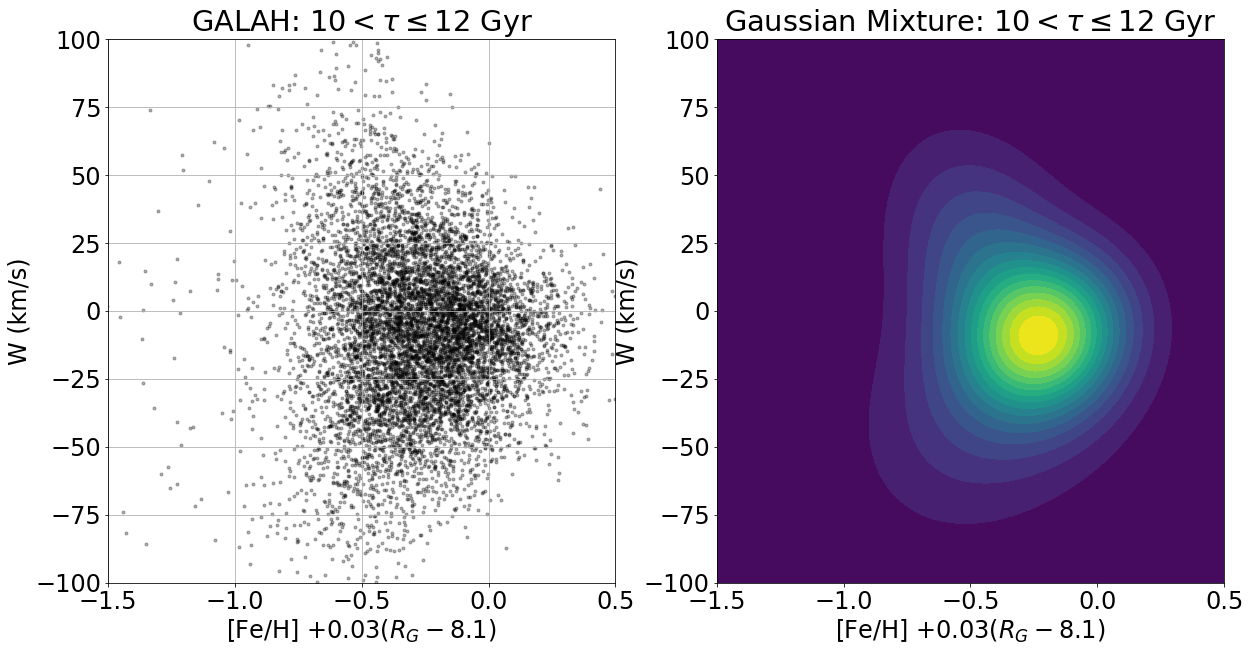

100%|██████████| 100/100 [00:00<00:00, 1054.24it/s]


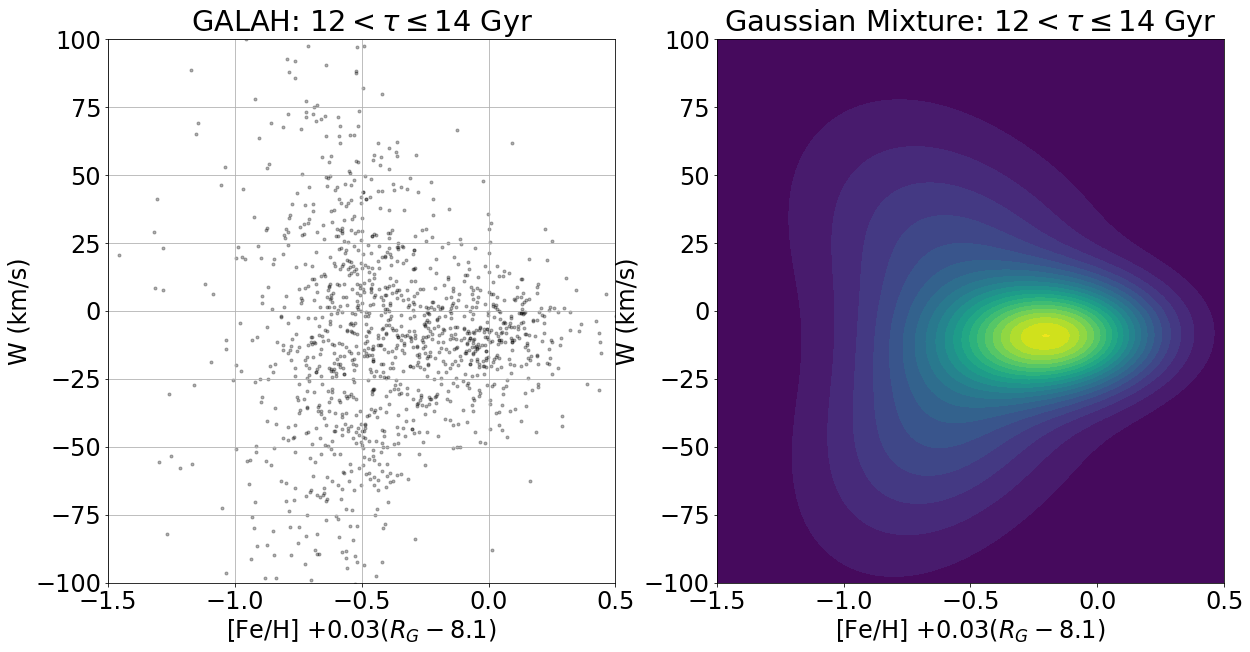

In [3]:
# get the GM models from GALAH
GM.find_GMMs(plot_dir='paper_plots')

In [4]:
KM = KM_metals(metals_file='gaia_DR3_photo_metallicities.txt',
               gaia_file='gaia_file/gaia_K_dwarf_RV_DR3-result.csv')

  0%|          | 0/59729 [00:00<?, ?it/s]

In [ ]:
# make figure 1 in the table
import mpl_scatter_density
import numpy as np

gaia = pd.read_csv('gaia_file/gaia_K_dwarf_RV_DR3-result.csv',
                    usecols=[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15],
                    names=['RA', 'DEC', 'ID', 'plx', 'pmra',
                           'pmde', 'G', 'BP', 'RP', 'rv', 'rv_err'],
                    skiprows=1)

fig = plt.figure(figsize=(35, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='scatter_density')
ax1.scatter_density(gaia['BP'] - gaia['RP'],
                    gaia['G'] + 5 * np.log10())

../500_pc_KM_rv_cross_match/gm_age_relation.py:700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.KM_metals['group'][ev] = n

../500_pc_KM_rv_cross_match/gm_age_relation.py:741: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs['%d' % i]['group_pca'][ev] = i



IndexError: Boolean index has wrong length: 59729 instead of 11987

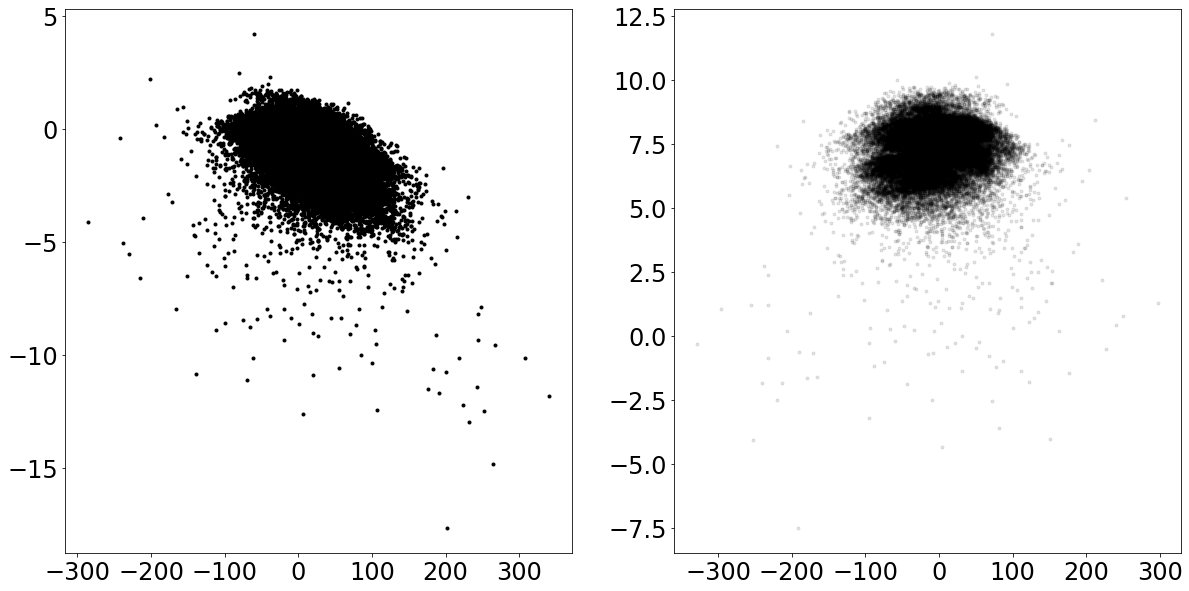

In [5]:
KM.assign_kinematic_groups()